In [137]:
import pandas as pd


* Algumas constantes

In [138]:
area_cerrado_maranhense = 217029
area_cerrado_maranhense

217029

In [139]:
area_estado_ma = 329651
area_estado_ma

329651

In [140]:
area_cerrado_maranhense/ area_estado_ma

0.6583599018355776

## Carregando os dados

In [141]:
df = pd.read_csv('dados/csv/terrabrasilis_cerrado_5_18_2024,_11_26_39 AM.csv')
df.head()

,year,areakm,municipality,geocode_ibge,state
0,2000,42.515084,Afonso Cunha,2100105,Maranhão
1,2001,1.687509,Afonso Cunha,2100105,Maranhão
2,2002,1.687509,Afonso Cunha,2100105,Maranhão
3,2003,3.922876,Afonso Cunha,2100105,Maranhão
4,2004,3.922876,Afonso Cunha,2100105,Maranhão


* Para quais anos temos dados ?

In [142]:
df["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

## Algumas perguntas inicias, sobre o desmatamento absoluto e relativo

* Qual o total de desmatamento no bioma ?

In [143]:
total_desmatamento = df["areakm"].sum()
print( total_desmatamento, total_desmatamento / area_cerrado_maranhense)

89880.3660872508 0.4141398895412632


* Qual o total de desmatamento no bioma, na mascara de 2000 ?

In [144]:
total_desmatamento_00 = df[df["year"] == 2000]["areakm"].sum()
print( total_desmatamento_00, total_desmatamento_00 / area_cerrado_maranhense)

41356.95237303544 0.19055956749114378


* Qual o total de desmatamento no bioma, de 2001 a 2023 ?

In [145]:
total_desmatamento_01_23 = df[df["year"] != 2000]["areakm"].sum()
print( total_desmatamento_01_23, total_desmatamento_01_23 / area_cerrado_maranhense)

48523.41371421536 0.2235803220501194


## Visualizando a evolução do desmatamento no bioma

In [146]:
df_por_ano = df.groupby("year")["areakm"].sum().reset_index().set_index("year")
df_por_ano

,areakm
year,
2000,41356.952373
2001,2338.595392
2002,2338.595392
2003,2908.182797
2004,2908.182797
2005,2431.024448
2006,2431.024448
2007,2961.520519
2008,2961.520519


In [147]:
df_por_ano["Percentual do Bioma"] = df_por_ano["areakm"] / area_cerrado_maranhense
df_por_ano

,areakm,Percentual do Bioma
year,,
2000,41356.952373,0.190560
2001,2338.595392,0.010775
2002,2338.595392,0.010775
2003,2908.182797,0.013400
2004,2908.182797,0.013400
2005,2431.024448,0.011201
2006,2431.024448,0.011201
2007,2961.520519,0.013646
2008,2961.520519,0.013646


* variação, ou aceleração

In [148]:
aceleracao_desmatamento = df_por_ano.pct_change().drop([2000, 2001]) * 100
aceleracao_desmatamento.head()

,areakm,Percentual do Bioma
year,,
2002,0.000000,0.000000
2003,24.355962,24.355962
2004,0.000000,0.000000
2005,-16.407440,-16.407440
2006,0.000000,0.000000


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

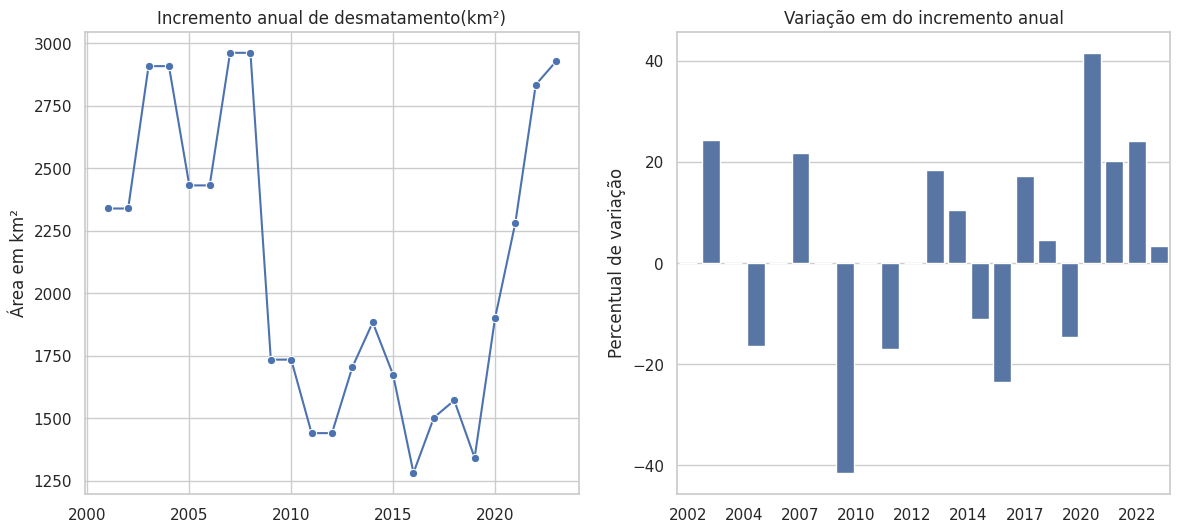

In [150]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.lineplot(ax=axs[0], x='year', y='areakm', data=df_por_ano.drop(2000), marker='o', legend=False)

axs[0].set_title('Incremento anual de desmatamento(km²)')
axs[0].set_xlabel('')
axs[0].set_ylabel('Área em km²')


sns.barplot(ax=axs[1], x='year', y='areakm', data=aceleracao_desmatamento, )
axs[1].xaxis.set_major_locator(plt.AutoLocator())

axs[1].set(title='Variação em do incremento anual', xlabel='', ylabel='Percentual de variação')


plt.show()


## Visualizando por municipio

### Preparando o dado

* agrupar por municipio

In [151]:
df_por_mun = df.groupby(["geocode_ibge","municipality","year"])["areakm"].first().unstack().reset_index().set_index("geocode_ibge")
df_por_mun.index.name = "geocode"
df_por_mun.head()

year,municipality,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
geocode,,,,,,,,,,,,,,,,,,,,,
2100105,Afonso Cunha,42.515084,1.687509,1.687509,3.922876,3.922876,1.355789,1.355789,3.786717,3.786717,...,0.984561,8.254625,5.729277,18.178811,6.627577,8.303116,7.185932,3.296597,2.747247,4.186628
2100154,Água Doce do Maranhão,64.003850,8.968045,8.968045,18.288683,18.288683,10.526301,10.526301,10.479238,10.479238,...,5.720458,4.226481,6.334058,4.823428,8.401773,4.966519,4.668220,3.145991,3.628249,2.505242
2100303,Aldeias Altas,93.311739,14.068892,14.068892,24.528664,24.528664,25.203367,25.203367,43.636436,43.636436,...,8.372906,9.312877,3.497253,6.984161,8.742854,12.293774,11.907539,85.203531,99.131740,54.036724
2100436,Alto Alegre do Maranhão,278.668521,4.362173,4.362173,8.383284,8.383284,3.197358,3.197358,4.355761,4.355761,...,1.662265,3.000325,0.162847,1.073610,1.061967,1.564407,0.905481,0.374098,1.686070,1.541568
2100501,Alto Parnaíba,509.572054,32.030547,32.030547,63.398056,63.398056,18.698535,18.698535,88.091243,88.091243,...,13.133912,33.036303,59.569205,81.909833,17.098499,30.587533,38.870550,55.979650,141.030410,255.546576


In [152]:
import geopandas as gpd

* Carregando os dados espaciais

In [153]:
gdf_mun = gpd.read_file("dados/limites/MA_Municipios_2022.zip")
gdf_mun.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2100055,Açailândia,MA,5805.159,"POLYGON ((-47.40208 -5.03469, -47.47673 -5.046..."
1,2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223..."
2,2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844..."
3,2100204,Alcântara,MA,1167.964,"MULTIPOLYGON (((-44.57175 -2.21957, -44.56274 ..."
4,2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644..."


* para integrar os dados, vamos precisar que os tipos das colunas sejam iguais

In [154]:
gdf_mun["CD_MUN"]

0      2100055
1      2100105
2      2100154
3      2100204
4      2100303
        ...   
212    2112803
213    2112852
214    2112902
215    2113009
216    2114007
Name: CD_MUN, Length: 217, dtype: object

In [155]:
df_por_mun.index

Index([2100105, 2100154, 2100303, 2100436, 2100501, 2100600, 2100709, 2100808,
       2100907, 2100956,
       ...
       2111904, 2111953, 2112001, 2112100, 2112209, 2112233, 2112308, 2112506,
       2112605, 2112704],
      dtype='int64', name='geocode', length=139)

In [156]:
gdf_mun["CD_MUN"] = gdf_mun["CD_MUN"].astype('int64')
gdf_mun.set_index("CD_MUN", inplace=True)
gdf_mun.head()


,NM_MUN,SIGLA_UF,AREA_KM2,geometry
CD_MUN,,,,
2100055,Açailândia,MA,5805.159,"POLYGON ((-47.40208 -5.03469, -47.47673 -5.046..."
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223..."
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844..."
2100204,Alcântara,MA,1167.964,"MULTIPOLYGON (((-44.57175 -2.21957, -44.56274 ..."
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644..."


<Axes: >

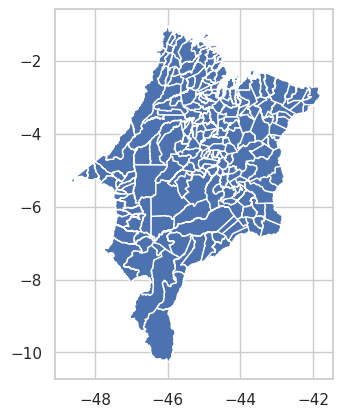

In [157]:
gdf_mun.plot()

* selecionar apenas os que temos dados, dentro do cerrado

In [158]:
gdf_mun_cerrado = gdf_mun.loc[df_por_mun.index]

<Axes: >

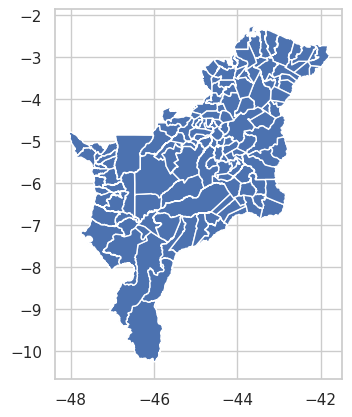

In [159]:
gdf_mun_cerrado.plot()

* incluir no dado geografico o desmatamento em km2 de 2000 e o percentual

In [160]:
gdf_mun_cerrado["D2000_km2"] = df_por_mun[2000]
gdf_mun_cerrado["D2000_Perc"] = df_por_mun[2000] / gdf_mun_cerrado["AREA_KM2"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc
geocode,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046


* desmatamento de 2001 a 2023

In [161]:
gdf_mun_cerrado["D2001-23_km2"] = df_por_mun[range(2001,2024)].sum(axis=1)
gdf_mun_cerrado["D2001-23_perc"] = gdf_mun_cerrado["D2001-23_km2"] / gdf_mun_cerrado["AREA_KM2"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc
geocode,,,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492,93.137045,0.250815
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709,168.707853,0.381440
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046,580.655785,0.298980


In [162]:
gdf_mun_cerrado["D2000-23_perc"] = gdf_mun_cerrado["D2001-23_perc"] + gdf_mun_cerrado["D2000_Perc"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc,D2000-23_perc
geocode,,,,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492,93.137045,0.250815,0.365306
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709,168.707853,0.381440,0.526149
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046,580.655785,0.298980,0.347027


In [163]:
gdf_mun_cerrado["D2000-23_km2"] = gdf_mun_cerrado["D2001-23_km2"] + gdf_mun_cerrado["D2000_km2"]
gdf_mun_cerrado.head(3)

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc,D2000-23_perc,D2000-23_km2
geocode,,,,,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492,93.137045,0.250815,0.365306,135.652129
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709,168.707853,0.381440,0.526149,232.711704
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046,580.655785,0.298980,0.347027,673.967524


In [215]:
gdf_mun_cerrado["VariacaoAbsoluta"] = gdf_mun_cerrado["D2001-23_km2"] / gdf_mun_cerrado["D2000_km2"]

### Analisando o desmatamento absoluto

#### Curiosidade, por variacao absoluta

In [235]:
gdf_mun_cerrado.sort_values("VariacaoAbsoluta", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Nina Rodrigues,570.938,6.035812,101.794393,95.758581,15.865071
Milagres do Maranhão,634.818,11.788075,187.549980,175.761905,14.910144
São Félix de Balsas,2032.599,30.956119,460.619645,429.663526,13.879761
São Benedito do Rio Preto,931.485,16.976996,220.016067,203.039070,11.959658
Morros,1712.121,6.691281,80.123428,73.432147,10.974303
Belágua,569.606,10.343720,105.627458,95.283738,9.211747
Anapurus,608.903,29.749528,294.910163,265.160635,8.913104
Urbano Santos,1707.621,63.925134,613.125730,549.200596,8.591309
Santa Quitéria do Maranhão,1430.330,54.276505,453.913004,399.636498,7.362974


#### Por quantidade de desmatamento

In [ ]:
gdf_mun_cerrado.sort_values("VariacaoAbsoluta", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Nina Rodrigues,570.938,6.035812,101.794393,95.758581,15.865071
Milagres do Maranhão,634.818,11.788075,187.549980,175.761905,14.910144
São Félix de Balsas,2032.599,30.956119,460.619645,429.663526,13.879761
São Benedito do Rio Preto,931.485,16.976996,220.016067,203.039070,11.959658
Morros,1712.121,6.691281,80.123428,73.432147,10.974303
Belágua,569.606,10.343720,105.627458,95.283738,9.211747
Anapurus,608.903,29.749528,294.910163,265.160635,8.913104
Urbano Santos,1707.621,63.925134,613.125730,549.200596,8.591309
Santa Quitéria do Maranhão,1430.330,54.276505,453.913004,399.636498,7.362974


In [242]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2001-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845
Carolina,6267.675,273.449473,1565.798304,1292.348831,4.726097
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Caxias,5201.927,404.809461,1613.771877,1208.962415,2.986497
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tasso Fragoso,4369.159,477.325439,1575.329057,1098.003618,2.300325


In [244]:
total_top_absoluto = gdf_mun_top_absoluto["D2001-23_km2"].sum()
total_top_absoluto

21139.26787544974

In [245]:
total_top_absoluto / total_desmatamento_01_23

0.4356508797990197

In [258]:
total_area_top_absoluto =gdf_mun_top_absoluto["AREA_KM2"].sum()
total_area_top_absoluto

88972.094

In [259]:
total_area_top_absoluto / area_cerrado_maranhense

0.4099548631749674

In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2000-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Amarante do Maranhão,7439.615,1079.302987,1927.195891,847.892904,0.785593
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845


In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_cerrado.sort_values("VariacaoAbsoluta", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Nina Rodrigues,570.938,6.035812,101.794393,95.758581,15.865071
Milagres do Maranhão,634.818,11.788075,187.549980,175.761905,14.910144
São Félix de Balsas,2032.599,30.956119,460.619645,429.663526,13.879761
São Benedito do Rio Preto,931.485,16.976996,220.016067,203.039070,11.959658
Morros,1712.121,6.691281,80.123428,73.432147,10.974303
Belágua,569.606,10.343720,105.627458,95.283738,9.211747
Anapurus,608.903,29.749528,294.910163,265.160635,8.913104
Urbano Santos,1707.621,63.925134,613.125730,549.200596,8.591309
Santa Quitéria do Maranhão,1430.330,54.276505,453.913004,399.636498,7.362974


In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2001-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845
Carolina,6267.675,273.449473,1565.798304,1292.348831,4.726097
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Caxias,5201.927,404.809461,1613.771877,1208.962415,2.986497
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tasso Fragoso,4369.159,477.325439,1575.329057,1098.003618,2.300325


In [ ]:
gdf_mun_top_absoluto_var["D2001-23_km2"].sum()

5304.3718296023235

In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2000-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Amarante do Maranhão,7439.615,1079.302987,1927.195891,847.892904,0.785593
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845


In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_cerrado.sort_values("VariacaoAbsoluta", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Nina Rodrigues,570.938,6.035812,101.794393,95.758581,15.865071
Milagres do Maranhão,634.818,11.788075,187.549980,175.761905,14.910144
São Félix de Balsas,2032.599,30.956119,460.619645,429.663526,13.879761
São Benedito do Rio Preto,931.485,16.976996,220.016067,203.039070,11.959658
Morros,1712.121,6.691281,80.123428,73.432147,10.974303
Belágua,569.606,10.343720,105.627458,95.283738,9.211747
Anapurus,608.903,29.749528,294.910163,265.160635,8.913104
Urbano Santos,1707.621,63.925134,613.125730,549.200596,8.591309
Santa Quitéria do Maranhão,1430.330,54.276505,453.913004,399.636498,7.362974


In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2001-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845
Carolina,6267.675,273.449473,1565.798304,1292.348831,4.726097
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Caxias,5201.927,404.809461,1613.771877,1208.962415,2.986497
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tasso Fragoso,4369.159,477.325439,1575.329057,1098.003618,2.300325


In [ ]:
gdf_mun_top_absoluto_var["D2001-23_km2"].sum()

5304.3718296023235

In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2000-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Amarante do Maranhão,7439.615,1079.302987,1927.195891,847.892904,0.785593
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845


In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_cerrado.sort_values("VariacaoAbsoluta", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Nina Rodrigues,570.938,6.035812,101.794393,95.758581,15.865071
Milagres do Maranhão,634.818,11.788075,187.549980,175.761905,14.910144
São Félix de Balsas,2032.599,30.956119,460.619645,429.663526,13.879761
São Benedito do Rio Preto,931.485,16.976996,220.016067,203.039070,11.959658
Morros,1712.121,6.691281,80.123428,73.432147,10.974303
Belágua,569.606,10.343720,105.627458,95.283738,9.211747
Anapurus,608.903,29.749528,294.910163,265.160635,8.913104
Urbano Santos,1707.621,63.925134,613.125730,549.200596,8.591309
Santa Quitéria do Maranhão,1430.330,54.276505,453.913004,399.636498,7.362974


In [236]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2001-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845
Carolina,6267.675,273.449473,1565.798304,1292.348831,4.726097
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Caxias,5201.927,404.809461,1613.771877,1208.962415,2.986497
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tasso Fragoso,4369.159,477.325439,1575.329057,1098.003618,2.300325


In [234]:
gdf_mun_top_absoluto_var["D2001-23_km2"].sum()

5304.3718296023235

In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [216]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2000-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Amarante do Maranhão,7439.615,1079.302987,1927.195891,847.892904,0.785593
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845


In [227]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [228]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [229]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [230]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [231]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [232]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

### Desmatamento Relativo

In [237]:
gdf_mun_cerrado.head()

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc,D2000-23_perc,D2000-23_km2,VariacaoAbsoluta
geocode,,,,,,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492,93.137045,0.250815,0.365306,135.652129,2.190682
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709,168.707853,0.381440,0.526149,232.711704,2.635902
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046,580.655785,0.298980,0.347027,673.967524,6.222752
2100436,Alto Alegre do Maranhão,MA,392.750,"POLYGON ((-44.33387 -4.26917, -44.33414 -4.269...",278.668521,0.709532,63.391381,0.161404,0.870935,342.059902,0.227480
2100501,Alto Parnaíba,MA,11127.384,"POLYGON ((-45.87754 -10.06378, -45.87726 -10.0...",509.572054,0.045794,1299.329932,0.116769,0.162563,1808.901986,2.549845


In [256]:
gdf_mun_top_relativo = gdf_mun_cerrado.sort_values("D2001-23_perc", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_Perc", "D2000-23_perc","D2001-23_perc"]].set_index("NM_MUN")
gdf_mun_top_relativo

,AREA_KM2,D2000_Perc,D2000-23_perc,D2001-23_perc
NM_MUN,,,,
Governador Eugênio Barros,647.989,0.261088,0.889019,0.627931
Governador Luiz Rocha,401.587,0.160646,0.721080,0.560434
Senador Alexandre Costa,426.437,0.180493,0.711848,0.531355
São Domingos do Maranhão,1151.978,0.411800,0.848859,0.437059
Anapurus,608.903,0.048858,0.484330,0.435473
Graça Aranha,271.445,0.412015,0.844384,0.432369
São João do Soter,1438.067,0.073647,0.505230,0.431583
Matões,2108.671,0.092699,0.519062,0.426363
Santa Filomena do Maranhão,623.213,0.240052,0.640024,0.399973


In [257]:
total_desmatado_top_relativo = (gdf_mun_top_relativo["AREA_KM2"] * gdf_mun_top_relativo["D2001-23_perc"]).sum()
total_desmatado_top_relativo

6911.282870136668

In [255]:
total_desmatado_top_relativo / total_desmatamento_01_23

0.14243191773030484

In [260]:
total_area_top_relativo = gdf_mun_top_relativo["AREA_KM2"].sum()
total_area_top_relativo

16538.999

In [261]:
total_area_top_relativo / area_cerrado_maranhense

0.0762064009878864

In [263]:
gdf_mun_top_relativo["Rank"] = range(1,16)
gdf_mun_top_relativo.head()

,AREA_KM2,D2000_Perc,D2000-23_perc,D2001-23_perc,Rank
NM_MUN,,,,,
Governador Eugênio Barros,647.989,0.261088,0.889019,0.627931,1
Governador Luiz Rocha,401.587,0.160646,0.721080,0.560434,2
Senador Alexandre Costa,426.437,0.180493,0.711848,0.531355,3
São Domingos do Maranhão,1151.978,0.411800,0.848859,0.437059,4
Anapurus,608.903,0.048858,0.484330,0.435473,5


In [265]:
gdf_mun_top_relativo.columns = ["Área do município","2000 (%)","2023 (%)","Diferença (%)","Rank"]
gdf_mun_top_relativo.index.name = "Município"

In [266]:
gdf_mun_top_relativo

,Área do município,2000 (%),2023 (%),Diferença (%),Rank
Município,,,,,
Governador Eugênio Barros,647.989,0.261088,0.889019,0.627931,1
Governador Luiz Rocha,401.587,0.160646,0.721080,0.560434,2
Senador Alexandre Costa,426.437,0.180493,0.711848,0.531355,3
São Domingos do Maranhão,1151.978,0.411800,0.848859,0.437059,4
Anapurus,608.903,0.048858,0.484330,0.435473,5
Graça Aranha,271.445,0.412015,0.844384,0.432369,6
São João do Soter,1438.067,0.073647,0.505230,0.431583,7
Matões,2108.671,0.092699,0.519062,0.426363,8
Santa Filomena do Maranhão,623.213,0.240052,0.640024,0.399973,9


In [267]:
s_top_relativo = gdf_mun_top_relativo.style
s_top_relativo

,Área do município,2000 (%),2023 (%),Diferença (%),Rank
Município,,,,,
Governador Eugênio Barros,647.989000,0.261088,0.889019,0.627931,1
Governador Luiz Rocha,401.587000,0.160646,0.721080,0.560434,2
Senador Alexandre Costa,426.437000,0.180493,0.711848,0.531355,3
São Domingos do Maranhão,1151.978000,0.411800,0.848859,0.437059,4
Anapurus,608.903000,0.048858,0.484330,0.435473,5
Graça Aranha,271.445000,0.412015,0.844384,0.432369,6
São João do Soter,1438.067000,0.073647,0.505230,0.431583,7
Matões,2108.671000,0.092699,0.519062,0.426363,8
Santa Filomena do Maranhão,623.213000,0.240052,0.640024,0.399973,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [270]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_relativo.format({
        'Área do município':formatar_valor,
        '2000 (%)' : '{:.0%}',
        '2023 (%)' : '{:.0%}',
        'Diferença (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000 (%),2023 (%),Diferença (%),Rank
Município,,,,,
Governador Eugênio Barros,"648,0",26%,89%,63%,1
Governador Luiz Rocha,"401,6",16%,72%,56%,2
Senador Alexandre Costa,"426,4",18%,71%,53%,3
São Domingos do Maranhão,"1.152,0",41%,85%,44%,4
Anapurus,"608,9",5%,48%,44%,5
Graça Aranha,"271,4",41%,84%,43%,6
São João do Soter,"1.438,1",7%,51%,43%,7
Matões,"2.108,7",9%,52%,43%,8
Santa Filomena do Maranhão,"623,2",24%,64%,40%,9


In [271]:
print (s_top_relativo.to_html())

<style type="text/css">
#T_a616b_row0_col2, #T_a616b_row0_col3, #T_a616b_row10_col0, #T_a616b_row12_col1, #T_a616b_row14_col4 {
  background-color: darkgray;
  background-color: darkgray;
}
#T_a616b_row0_col4, #T_a616b_row4_col1, #T_a616b_row5_col0, #T_a616b_row13_col2, #T_a616b_row14_col3 {
  background-color: lightgray;
  background-color: lightgray;
}
</style>
<table id="T_a616b">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_a616b_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_a616b_level0_col1" class="col_heading level0 col1" >2000 (%)</th>
      <th id="T_a616b_level0_col2" class="col_heading level0 col2" >2023 (%)</th>
      <th id="T_a616b_level0_col3" class="col_heading level0 col3" >Diferença (%)</th>
      <th id="T_a616b_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="

In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2000-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Amarante do Maranhão,7439.615,1079.302987,1927.195891,847.892904,0.785593
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845


In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_cerrado.sort_values("VariacaoAbsoluta", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Nina Rodrigues,570.938,6.035812,101.794393,95.758581,15.865071
Milagres do Maranhão,634.818,11.788075,187.549980,175.761905,14.910144
São Félix de Balsas,2032.599,30.956119,460.619645,429.663526,13.879761
São Benedito do Rio Preto,931.485,16.976996,220.016067,203.039070,11.959658
Morros,1712.121,6.691281,80.123428,73.432147,10.974303
Belágua,569.606,10.343720,105.627458,95.283738,9.211747
Anapurus,608.903,29.749528,294.910163,265.160635,8.913104
Urbano Santos,1707.621,63.925134,613.125730,549.200596,8.591309
Santa Quitéria do Maranhão,1430.330,54.276505,453.913004,399.636498,7.362974


In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2001-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845
Carolina,6267.675,273.449473,1565.798304,1292.348831,4.726097
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Caxias,5201.927,404.809461,1613.771877,1208.962415,2.986497
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tasso Fragoso,4369.159,477.325439,1575.329057,1098.003618,2.300325


In [ ]:
gdf_mun_top_absoluto_var["D2001-23_km2"].sum()

5304.3718296023235

In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2000-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Amarante do Maranhão,7439.615,1079.302987,1927.195891,847.892904,0.785593
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845


In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_cerrado.sort_values("VariacaoAbsoluta", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Nina Rodrigues,570.938,6.035812,101.794393,95.758581,15.865071
Milagres do Maranhão,634.818,11.788075,187.549980,175.761905,14.910144
São Félix de Balsas,2032.599,30.956119,460.619645,429.663526,13.879761
São Benedito do Rio Preto,931.485,16.976996,220.016067,203.039070,11.959658
Morros,1712.121,6.691281,80.123428,73.432147,10.974303
Belágua,569.606,10.343720,105.627458,95.283738,9.211747
Anapurus,608.903,29.749528,294.910163,265.160635,8.913104
Urbano Santos,1707.621,63.925134,613.125730,549.200596,8.591309
Santa Quitéria do Maranhão,1430.330,54.276505,453.913004,399.636498,7.362974


In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2001-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845
Carolina,6267.675,273.449473,1565.798304,1292.348831,4.726097
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Caxias,5201.927,404.809461,1613.771877,1208.962415,2.986497
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tasso Fragoso,4369.159,477.325439,1575.329057,1098.003618,2.300325


In [ ]:
gdf_mun_top_absoluto_var["D2001-23_km2"].sum()

5304.3718296023235

In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2000-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Amarante do Maranhão,7439.615,1079.302987,1927.195891,847.892904,0.785593
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845


In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_cerrado.sort_values("VariacaoAbsoluta", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Nina Rodrigues,570.938,6.035812,101.794393,95.758581,15.865071
Milagres do Maranhão,634.818,11.788075,187.549980,175.761905,14.910144
São Félix de Balsas,2032.599,30.956119,460.619645,429.663526,13.879761
São Benedito do Rio Preto,931.485,16.976996,220.016067,203.039070,11.959658
Morros,1712.121,6.691281,80.123428,73.432147,10.974303
Belágua,569.606,10.343720,105.627458,95.283738,9.211747
Anapurus,608.903,29.749528,294.910163,265.160635,8.913104
Urbano Santos,1707.621,63.925134,613.125730,549.200596,8.591309
Santa Quitéria do Maranhão,1430.330,54.276505,453.913004,399.636498,7.362974


In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2001-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845
Carolina,6267.675,273.449473,1565.798304,1292.348831,4.726097
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Caxias,5201.927,404.809461,1613.771877,1208.962415,2.986497
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tasso Fragoso,4369.159,477.325439,1575.329057,1098.003618,2.300325


In [ ]:
gdf_mun_top_absoluto_var["D2001-23_km2"].sum()

5304.3718296023235

In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

In [ ]:
gdf_mun_top_absoluto = gdf_mun_cerrado.sort_values("D2000-23_km2", ascending=False).head(15)[["NM_MUN","AREA_KM2","D2000_km2","D2000-23_km2","D2001-23_km2","VariacaoAbsoluta"]].set_index("NM_MUN")
gdf_mun_top_absoluto

,AREA_KM2,D2000_km2,D2000-23_km2,D2001-23_km2,VariacaoAbsoluta
NM_MUN,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391
Riachão,6402.830,625.418194,2161.431611,1536.013417,2.455978
Amarante do Maranhão,7439.615,1079.302987,1927.195891,847.892904,0.785593
Parnarama,3245.525,529.145459,1809.032703,1279.887244,2.418781
Alto Parnaíba,11127.384,509.572054,1808.901986,1299.329932,2.549845


In [ ]:
gdf_mun_top_absoluto["Rank"] = range(1,16)
gdf_mun_top_absoluto.head()

,Área do município,2000,2023,D2001-23_km2,Variação (%),Rank
Município,,,,,,
Balsas,13141.162,1712.366997,5292.880375,3580.513378,2.090973,1
Grajaú,8861.717,1213.262746,3782.748359,2569.485612,2.117831,2
Barra do Corda,5187.673,2080.920096,3079.388397,998.468300,0.479821,3
Codó,4361.606,1459.123108,2637.282986,1178.159878,0.807444,4
Tuntum,3369.121,1182.845876,2189.909659,1007.063782,0.851391,5


In [ ]:
gdf_mun_top_absoluto.columns = ["Área do município","2000","2023","D2001-23_km2","Variação (%)","Rank"]
gdf_mun_top_absoluto.index.name = "Município"

In [ ]:
s_top_absoluto = gdf_mun_top_absoluto.drop("D2001-23_km2", axis=1).style
s_top_absoluto

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,13141.162000,1712.366997,5292.880375,2.090973,1
Grajaú,8861.717000,1213.262746,3782.748359,2.117831,2
Barra do Corda,5187.673000,2080.920096,3079.388397,0.479821,3
Codó,4361.606000,1459.123108,2637.282986,0.807444,4
Tuntum,3369.121000,1182.845876,2189.909659,0.851391,5
Riachão,6402.830000,625.418194,2161.431611,2.455978,6
Amarante do Maranhão,7439.615000,1079.302987,1927.195891,0.785593,7
Parnarama,3245.525000,529.145459,1809.032703,2.418781,8
Alto Parnaíba,11127.384000,509.572054,1808.901986,2.549845,9


In [ ]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [ ]:
#s_top20_absoluto.format('{:,.0f}').highlight_max(color='darkgray').highlight_min(color ='lightgray')
s_top_absoluto.format({
        'Área do município':formatar_valor,
        '2000' : formatar_valor,
        '2023' : formatar_valor,
        'Variação (%)':'{:.0%}'
    }).highlight_max(color='darkgray').highlight_min(color ='lightgray')

,Área do município,2000,2023,Variação (%),Rank
Município,,,,,
Balsas,"13.141,2","1.712,4","5.292,9",209%,1
Grajaú,"8.861,7","1.213,3","3.782,7",212%,2
Barra do Corda,"5.187,7","2.080,9","3.079,4",48%,3
Codó,"4.361,6","1.459,1","2.637,3",81%,4
Tuntum,"3.369,1","1.182,8","2.189,9",85%,5
Riachão,"6.402,8","625,4","2.161,4",246%,6
Amarante do Maranhão,"7.439,6","1.079,3","1.927,2",79%,7
Parnarama,"3.245,5","529,1","1.809,0",242%,8
Alto Parnaíba,"11.127,4","509,6","1.808,9",255%,9


In [ ]:
print (s_top_absoluto.to_html())

<style type="text/css">
#T_091dd_row0_col0, #T_091dd_row0_col2, #T_091dd_row2_col1, #T_091dd_row11_col3, #T_091dd_row14_col4 {
  background-color: darkgray;
}
#T_091dd_row0_col4, #T_091dd_row2_col3, #T_091dd_row11_col1, #T_091dd_row14_col0, #T_091dd_row14_col2 {
  background-color: lightgray;
}
</style>
<table id="T_091dd">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_091dd_level0_col0" class="col_heading level0 col0" >Área do município</th>
      <th id="T_091dd_level0_col1" class="col_heading level0 col1" >2000</th>
      <th id="T_091dd_level0_col2" class="col_heading level0 col2" >2023</th>
      <th id="T_091dd_level0_col3" class="col_heading level0 col3" >Variação (%)</th>
      <th id="T_091dd_level0_col4" class="col_heading level0 col4" >Rank</th>
    </tr>
    <tr>
      <th class="index_name level0" >Município</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
   

## Visualizando espacialmente

In [274]:
gdf_mun_cerrado.head()

,NM_MUN,SIGLA_UF,AREA_KM2,geometry,D2000_km2,D2000_Perc,D2001-23_km2,D2001-23_perc,D2000-23_perc,D2000-23_km2,VariacaoAbsoluta
geocode,,,,,,,,,,,
2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223...",42.515084,0.114492,93.137045,0.250815,0.365306,135.652129,2.190682
2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844...",64.003850,0.144709,168.707853,0.381440,0.526149,232.711704,2.635902
2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644...",93.311739,0.048046,580.655785,0.298980,0.347027,673.967524,6.222752
2100436,Alto Alegre do Maranhão,MA,392.750,"POLYGON ((-44.33387 -4.26917, -44.33414 -4.269...",278.668521,0.709532,63.391381,0.161404,0.870935,342.059902,0.227480
2100501,Alto Parnaíba,MA,11127.384,"POLYGON ((-45.87754 -10.06378, -45.87726 -10.0...",509.572054,0.045794,1299.329932,0.116769,0.162563,1808.901986,2.549845


In [338]:
gdf_limite_cerrado_ma = gpd.read_file("dados/limites/cerrado_maranhense.zip")
gdf_limite_cerrado_ma.head()

,FEATURE_ID,NAME,LEVEL_1,COUNTRY,GEOCODE,CATEGORY,CATEGORY_N,VERSION,SOURCE,NAME_PT_BR,geometry
0,15,Maranhão,None,Brasil,None,state,Estado,2,IBGE,Maranhão,"POLYGON ((-43.38872 -2.34081, -43.38835 -2.341..."


In [ ]:

gdf_limite_cerrado_ma.to_crs(gdf_mun_cerrado.crs)
gdf_mun_cerrado_recortado = gpd.overlay(gdf_mun_cerrado, gdf_limite_cerrado_ma, how='intersection')

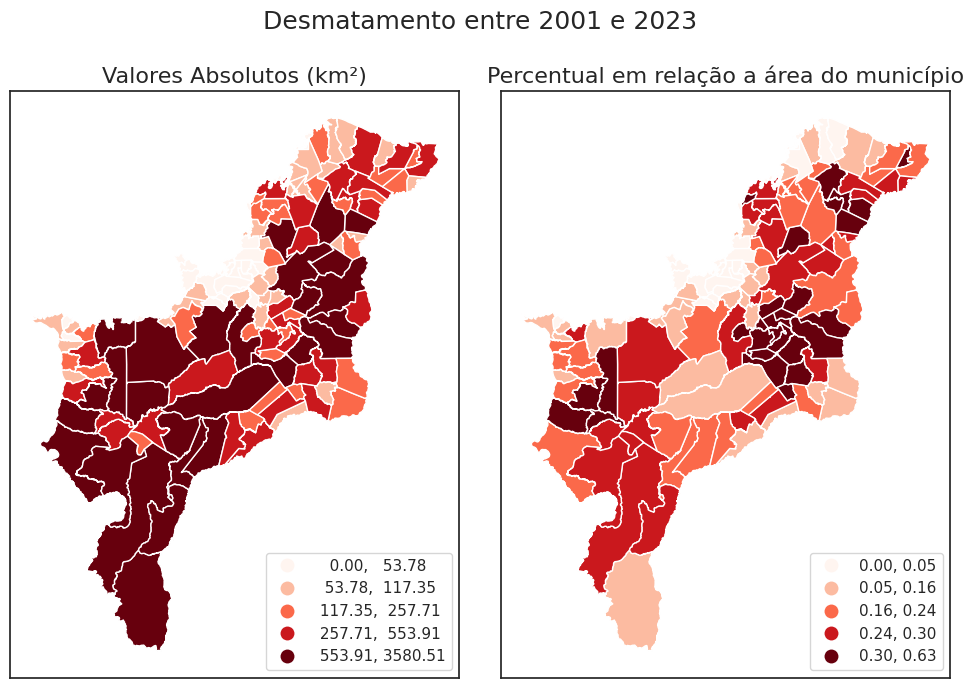

In [340]:
sns.set_theme(style="white")  # Estilo do gráfico


fig, axs = plt.subplots(1, 2, figsize=(10, 7))



ax1 = gdf_mun_cerrado_recortado.plot(
    ax = axs[0],
    column="D2001-23_km2",  # Data to plot
    scheme="quantiles",  # Classification scheme
    k=5,
    cmap="Reds",  # Color palette
    legend=True,  # Add legend
    #legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
    figsize=(10,100)
)


ax1.set_title('Valores Absolutos (km²)', fontsize=16)

# Customizar a legenda para posicioná-la no canto inferior direito
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1, 0))
leg._loc = 4  # loc=4 corresponde ao canto inferior direito


# Desativar os rótulos do eixo x
ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params( axis='y', labelleft=False)


ax2 = gdf_mun_cerrado_recortado.plot(
    ax = axs[1],
    column="D2001-23_perc",  # Data to plot
    scheme="quantiles",  # Classification scheme
    k=5,
    cmap="Reds",  # Color palette
    legend=True,  # Add legend
    #legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
    figsize=(10,100)
)
#ax2.set_axis_off()

ax2.set_title('Percentual em relação a área do município', fontsize=16)

# Customizar a legenda para posicioná-la no canto inferior direito
leg = ax2.get_legend()
leg.set_bbox_to_anchor((1, 0))
leg._loc = 4  # loc=4 corresponde ao canto inferior direito


# Desativar os rótulos do eixo x
ax2.tick_params(axis='x', labelbottom=False)
ax2.tick_params( axis='y', labelleft=False)
# Adicionar um título global e ajustar a posição vertical
fig.suptitle('Desmatamento entre 2001 e 2023', fontsize=18)

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

